# 项目- 某医疗数据的可视化统计

### 根据医疗数据发现其中特征数据；并做可视化分析  
> 该数据是某地的乳腺癌数据集，用于数据分类和教学，包括了对乳腺细胞测量之后的特征数据，
> 而且有标签，就是它把这些细胞都测量出来，包括很多特征：半径、纹理、周长、面积等；还有这个细胞被确诊是恶性还是良性的

In [3]:
#导入相关依赖库
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [6]:
#读数据，观察到多种特征值
data_df = pd.read_csv('某地乳腺检查数据.csv')
data_df.head()

,ID,诊断结果,平均半径,平均纹理,平均周长,平均面积,平均光滑度,平均致密度,平均凹度,平均凹点数,...,最差半径,最差纹理,最差周长,最差面积,最差光滑度,最差致密度,最差凹度,最差凹点数,最差对称性,最差分形维度
0,842302,确诊,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,确诊,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,8510426,健康,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.12880,0.2977,0.07259
3,8510653,健康,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.1890,0.07283,0.3184,0.08183
4,84300903,确诊,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758


In [11]:
# 设置X和y，x是自变量集合，y是因变量（诊断结果）
y = data_df["诊断结果"]
X = data_df.drop(["诊断结果", "ID"], axis=1)
X

,平均半径,平均纹理,平均周长,平均面积,平均光滑度,平均致密度,平均凹度,平均凹点数,平均对称性,平均分形维度,...,最差半径,最差纹理,最差周长,最差面积,最差光滑度,最差致密度,最差凹度,最差凹点数,最差对称性,最差分形维度
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902
2,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.2390,0.12880,0.2977,0.07259
3,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.1890,0.07283,0.3184,0.08183
4,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400


In [10]:
# 设置字体为SimHei，以正常显示中文标签
plt.rcParams["font.family"]=['SimHei'] 
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False 

- 使用series的plot方法
'''python
!(Series.plot(*args, **kwargs))[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html]

kindstr
The kind of plot to produce:

‘line’ : line plot (default)

‘bar’ : vertical bar plot

‘barh’ : horizontal bar plot

‘hist’ : histogram

‘box’ : boxplot

‘kde’ : Kernel Density Estimation plot

‘density’ : same as ‘kde’

‘area’ : area plot

‘pie’ : pie plot

‘scatter’ : scatter plot (DataFrame only)

‘hexbin’ : hexbin plot (DataFrame only)
'''

诊断结果
健康    357
确诊    212
Name: count, dtype: int64


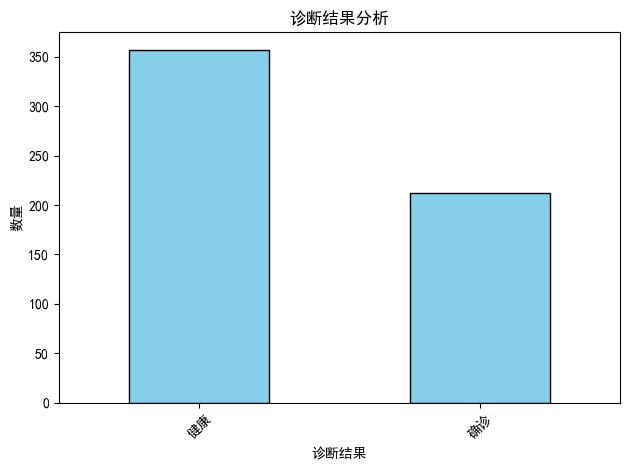

In [17]:
# 统计y的类型数据
print(y.value_counts())
# 使用series的plot方法
y.value_counts().plot(kind='bar', color = 'skyblue', edgecolor='black')
plt.title("诊断结果分析") #title
plt.xlabel("诊断结果") #x轴label
plt.ylabel("数量") #y轴label
plt.xticks(rotation=45) #x轴label的旋转角度
plt.tight_layout()
plt.show()

In [18]:
# 显示特征数据集的统计信息
X.describe()

,平均半径,平均纹理,平均周长,平均面积,平均光滑度,平均致密度,平均凹度,平均凹点数,平均对称性,平均分形维度,...,最差半径,最差纹理,最差周长,最差面积,最差光滑度,最差致密度,最差凹度,最差凹点数,最差对称性,最差分形维度
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
# 查看X的特征名称(列名）
features = X.columns
features

Index(['平均半径', '平均纹理', '平均周长', '平均面积', '平均光滑度', '平均致密度', '平均凹度', '平均凹点数',
       '平均对称性', '平均分形维度', '半径的标准误差', '纹理的标准误差', '周长的标准误差', '面积的标准误差',
       '光滑度的标准误差', '致密度的标准误差', '凹度的标准误差', '凹点数的标准误差', '对称性的标准误差', '分形维度的标准误差',
       '最差半径', '最差纹理', '最差周长', '最差面积', '最差光滑度', '最差致密度', '最差凹度', '最差凹点数',
       '最差对称性', '最差分形维度'],
      dtype='object')

###  绘制前三个特征的直方图

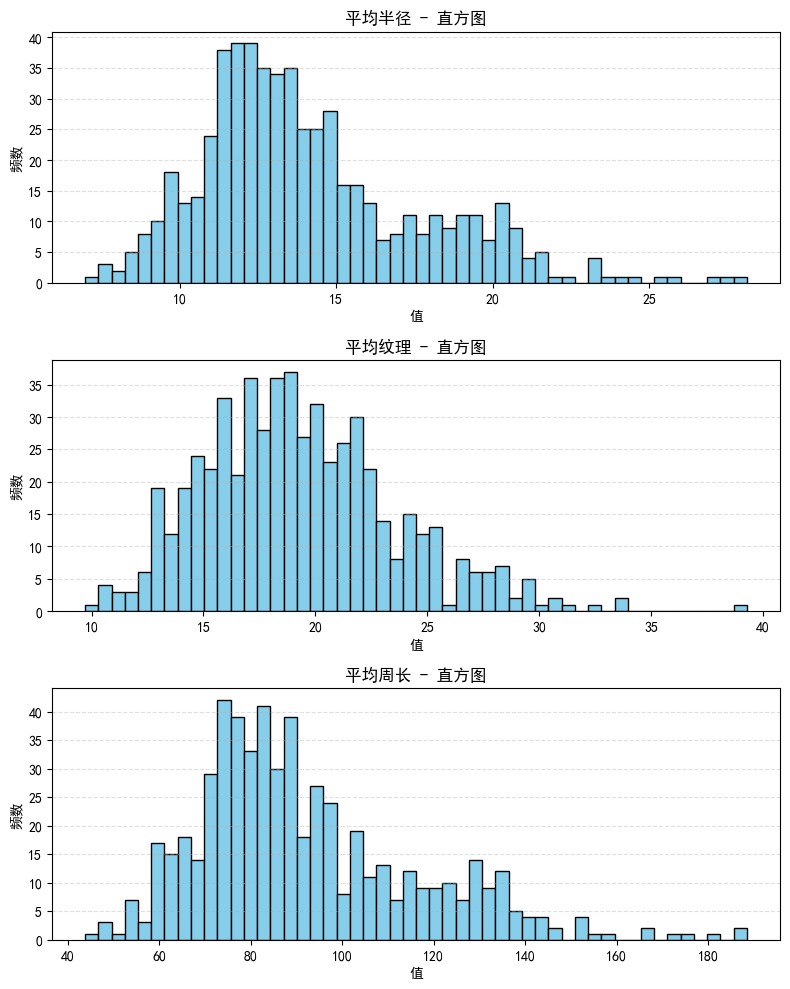

In [40]:
# 提前前三个特征
first_three_features = features[:3]
'''
定义
图表数量
nrows, ncols :int, default: 1
Number of rows/columns of the subplot grid.

尺寸
figsize(float, float), default: rcParams["figure.figsize"] (default: [6.4, 4.8])
Width, height in inches.

binsint or sequence or str, default: rcParams["hist.bins"] (default: 10)
If bins is an integer, it defines the number of equal-width bins in the range.

If bins is a sequence, it defines the bin edges, including the left edge of the first bin and the right edge of the last bin; in this case, bins may be unequally spaced. All but the last (righthand-most) bin is half-open. In other words, if bins is:

[1, 2, 3, 4]
then the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). The last bin, however, is [3, 4], which includes 4.

If bins is a string, it is one of the binning strategies supported by numpy.histogram_bin_edges: 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'.
'''
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,10))

#对每个特征绘图（hist）
for i, feature in enumerate(first_three_features):
    axes[i].hist(X[feature], bins=30, color='skyblue', edgecolor='black') #直方图：切分的更细致bins=50（桶））
    axes[i].set_title(f"{feature} - 直方图")
    axes[i].set_xlabel('值')
    axes[i].set_ylabel('频数')
    axes[i].grid(True,axis='y',linestyle='--',alpha=0.4) #只需要y轴的标线，用‘--’风格，透明度0.6
plt.tight_layout()
plt.show()


> 从上图看到，在**平均半径，平均周长，平均纹理**的分布图中，集中在某个区域的范围,占80%, 类似正态分布 

### 选择前10个特征,绘制箱线图

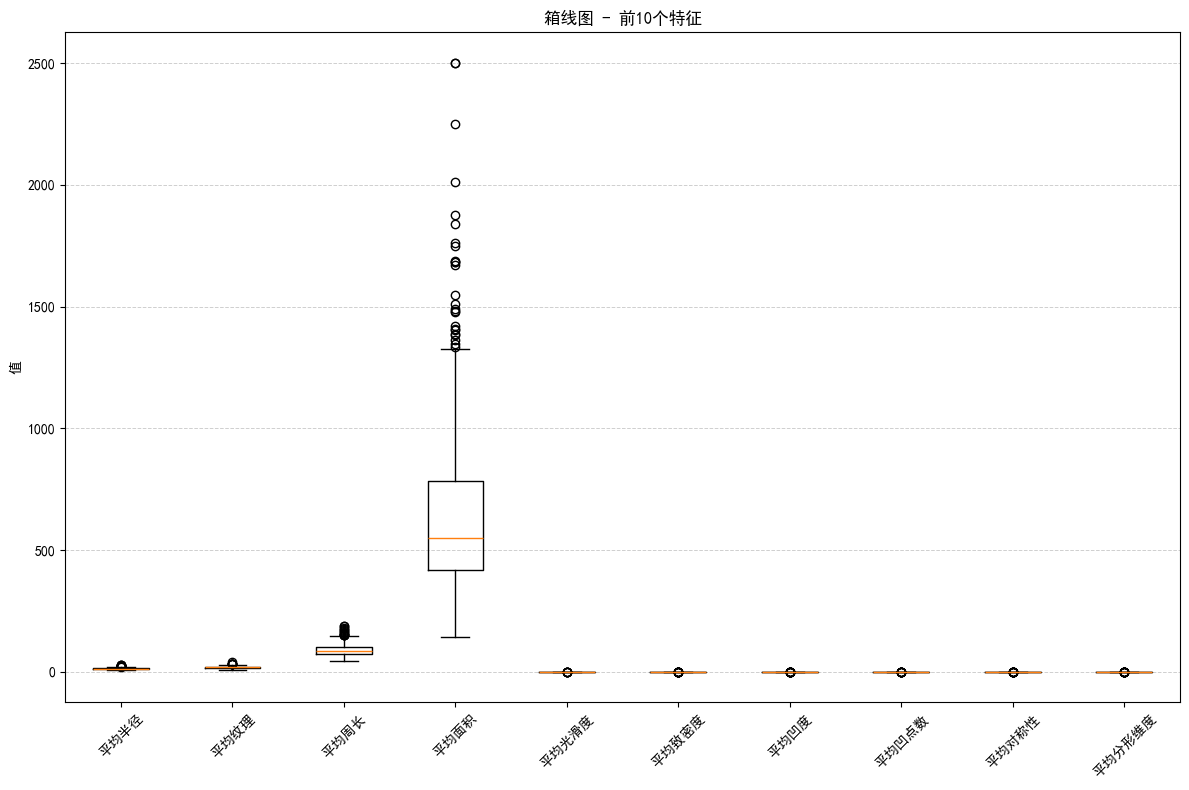

In [43]:
selected_features = features[:10]

#绘制箱线图
plt.figure(figsize=(12,8))
plt.boxplot([X[feature] for feature in selected_features], vert=True) #箱图：在一张图里面显示多个特征的箱线图
plt.xticks(range(1, len(selected_features)+1), selected_features,rotation=45)
plt.title('箱线图 - 前10个特征')
plt.ylabel('值')
plt.grid(True,axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()

> 由上面的图看到，数据没有被标准化，很多箱挤在一起  
> 做数据的标准化过程，需要sklearn的StandardScaler

In [47]:
# Standardizing X scaler:压缩数据图
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X) #拟合


# Extracting the standardized values of the selected features
X_selected_standardized = X_standardized[:,:10]


### 绘制标准化数据的箱图

> 数据分析关注的数据的变化状态，而不是数据的值本身

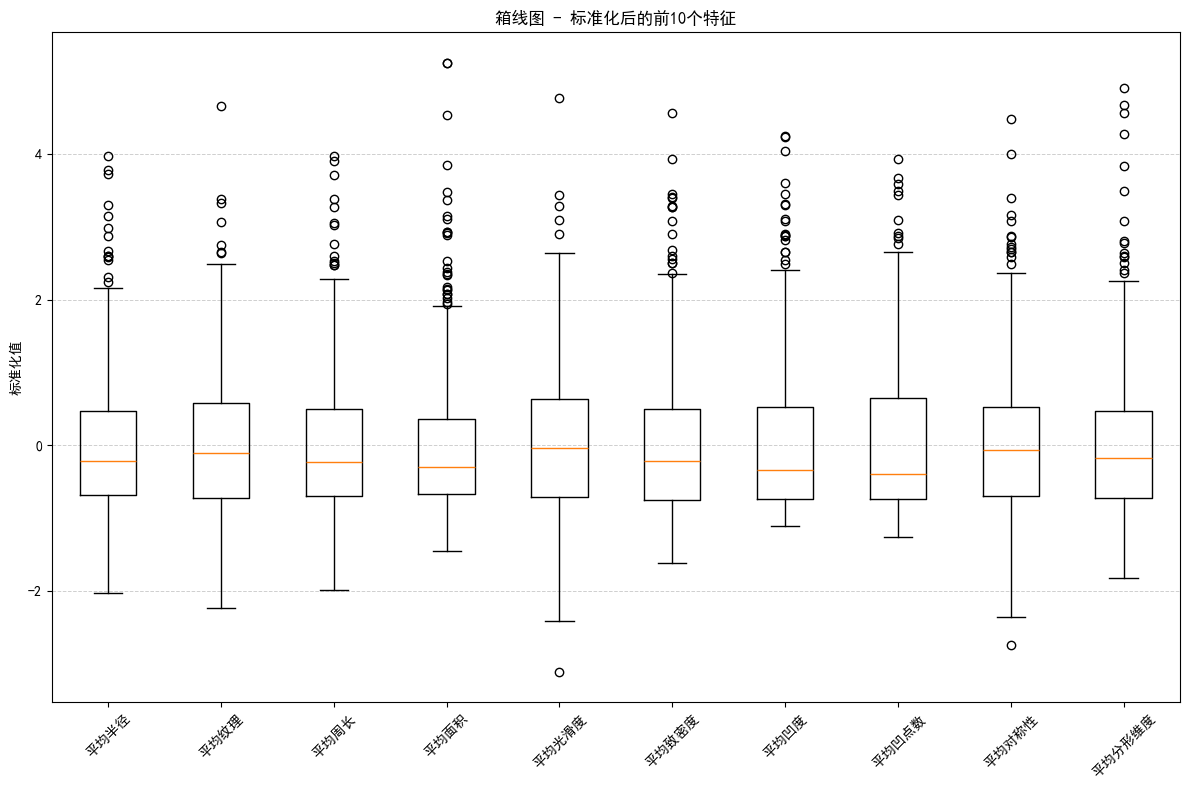

In [48]:

# ploting the boxplot for standardized values of the selected features
plt.figure(figsize=(12, 8))
plt.boxplot(X_selected_standardized, vert=True)
plt.xticks(range(1, len(selected_features) + 1), selected_features, rotation=45)
plt.title('箱线图 - 标准化后的前10个特征')
plt.ylabel('标准化值')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()

### 绘制标准化数据小提琴图

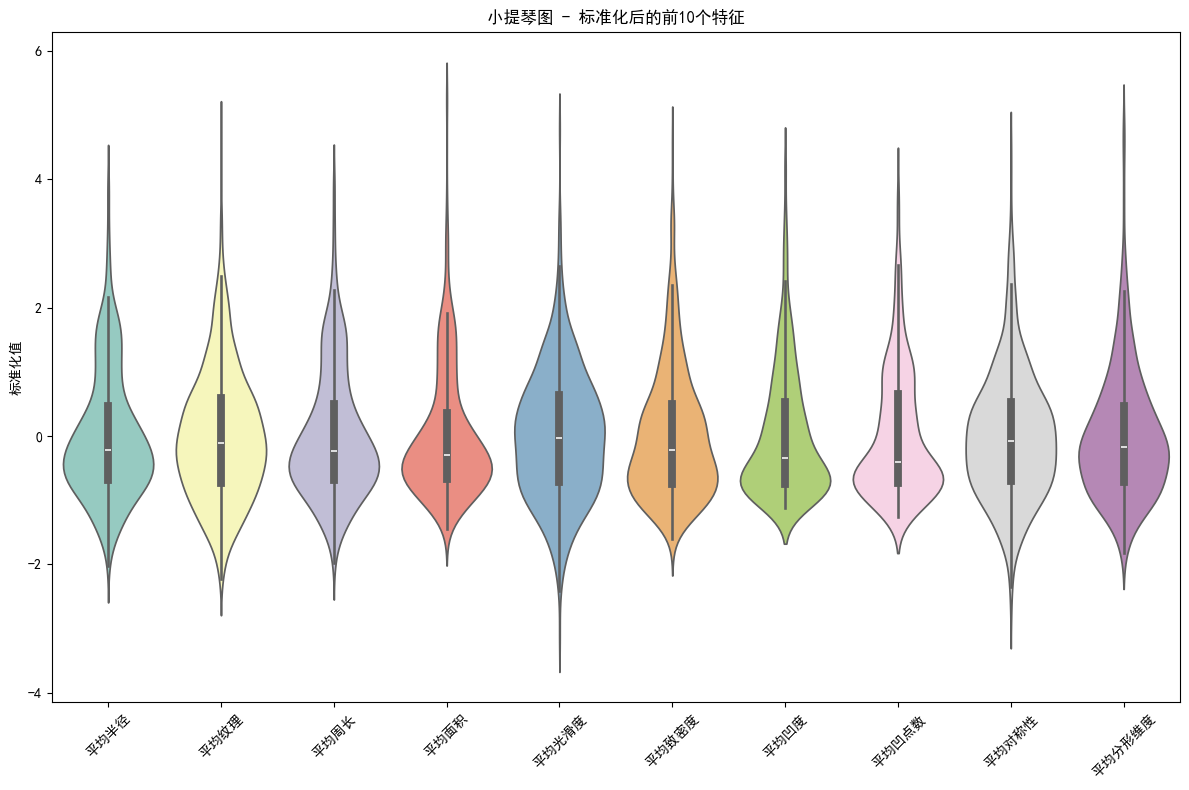

In [51]:
import seaborn as sns
#绘制小提琴图

plt.figure(figsize=(12,8))
sns.violinplot(data=pd.DataFrame(X_selected_standardized,columns=selected_features),palette="Set3")
plt.title('小提琴图 - 标准化后的前10个特征')
plt.ylabel('标准化值')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 绘制相关性热图

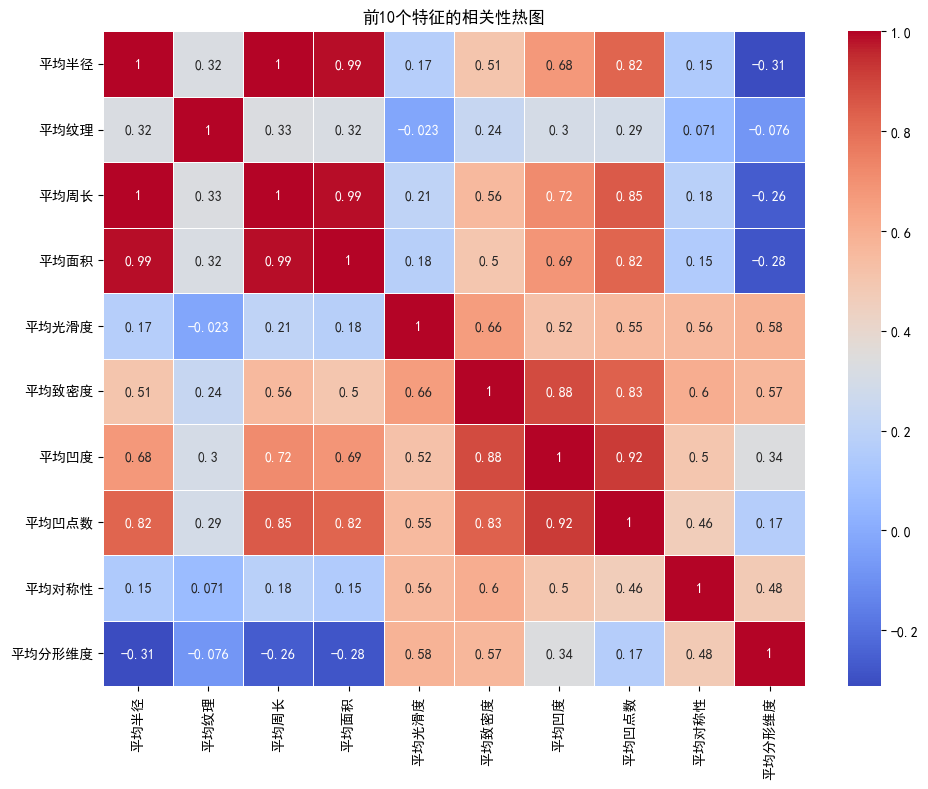

In [54]:
#计算相关性:corr()
correlation_matrix = pd.DataFrame(X_selected_standardized,columns=selected_features).corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', linewidths=0.5)
plt.title('前10个特征的相关性热图')
plt.tight_layout()
plt.show()

> 1: 相关性最相强，正值：正相关，负值：负相关  
> 相关并不等于因果